# Liquidity of Pools Related with Bostrom and Space-Pussy

In [1]:
from itertools import chain

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display, HTML

from src.data_extractors import get_pools_and_prices

#### Get Bostrom, Space-Pussy and Osmosis Pools Data

In [2]:
pools_df, price_df, price_enriched_df = get_pools_and_prices(networks=['bostrom', 'space-pussy', 'osmosis'],
                                                             zero_fee=True, get_human_readable_denom_from_ocr=True)
pools_df = \
    pools_df[
        (pools_df.network.isin(['bostrom', 'space-pussy'])) |
        (pools_df.reserve_coin_denoms.map(
            lambda denoms: 'boot in osmosis' in denoms or 'hydrogen in osmosis' in denoms))]
pools_df['liquidity, GH'] = pools_df['liquidity, hydrogen'] / 1e9
pools_df['denoms'] = pools_df.reserve_coin_denoms.map(lambda x: f'{x[0]} - {x[1]}')
pools_df[['network', 'id', 'liquidity, GH', 'balances', 'denoms', 'swap_fee']]

,network,id,"liquidity, GH",balances,denoms,swap_fee
0,bostrom,1,120476.274905,"[{'denom': 'boot', 'amount': '14950929016134',...",boot - hydrogen,0.003
1,bostrom,2,4565.617504,"[{'denom': 'boot', 'amount': '566586435947', '...",boot - milliampere,0.003
2,bostrom,3,562.156108,"[{'denom': 'boot', 'amount': '69762748528', 'w...",boot - tocyb,0.003
3,bostrom,4,1263.097869,"[{'denom': 'hydrogen', 'amount': '631548934344...",hydrogen - tocyb,0.003
4,bostrom,5,16769.802892,"[{'denom': 'hydrogen', 'amount': '838490144603...",hydrogen - milliampere,0.003
...,...,...,...,...,...,...
1295,osmosis,1558,0.000000,"[{'denom': 'hydrogen in osmosis', 'amount': '5...",hydrogen in osmosis - umpwr in osmosis,0.005
1296,osmosis,1559,95.982611,"[{'denom': 'hydrogen in osmosis', 'amount': '4...",hydrogen in osmosis - udsm in osmosis,0.005
1297,osmosis,1560,367.403779,"[{'denom': 'hydrogen in osmosis', 'amount': '1...",hydrogen in osmosis - boot in osmosis,0.005
1298,osmosis,1561,365.941103,"[{'denom': 'hydrogen in osmosis', 'amount': '1...",hydrogen in osmosis - boot in osmosis,0.002


#### Calculate Prices

#### Prices without References to the Networks

In [3]:
price_enriched_df

,ubld in osmosis,milliampere,pussy in bostrom,sol in osmosis,uctk in osmosis,adydx in osmosis,uatom in osmosis,hydrogen in osmosis,ppica in osmosis,ulore in osmosis,...,pussy,tocyb,dot in osmosis,boot in osmosis,wglmr-wei in osmosis,utia in osmosis,ugraviton in osmosis,uusdc in osmosis,uatom,ujuno
ubld in osmosis,1,NaN,NaN,NaN,NaN,NaN,NaN,0.050442,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
milliampere,NaN,1,NaN,NaN,NaN,NaN,NaN,0.000183,NaN,NaN,...,NaN,NaN,NaN,0.00073,NaN,NaN,NaN,NaN,NaN,NaN
pussy in bostrom,NaN,NaN,1,NaN,NaN,NaN,592714.676892,327.20987,NaN,NaN,...,1,NaN,NaN,1710.655207,NaN,NaN,NaN,NaN,592714.676892,NaN
sol in osmosis,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.018344,NaN,NaN,NaN,NaN,NaN,NaN
uctk in osmosis,NaN,NaN,NaN,NaN,1,NaN,NaN,0.009115,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
utia in osmosis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.002542,NaN,1,NaN,NaN,NaN,NaN
ugraviton in osmosis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.379799,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
uusdc in osmosis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.024648,NaN,NaN,NaN,1,NaN,NaN
uatom,NaN,NaN,0.000002,NaN,NaN,NaN,1,0.000735,NaN,NaN,...,0.000002,NaN,NaN,0.002897,NaN,NaN,NaN,NaN,1,0.026509


#### Get Pools Liquidity

In [4]:
def get_df_with_top_and_other(df: pd.DataFrame, col1_name: str = 'network', col2_name: str = 'denoms',
                              n: int = 10, min_liquidity: float = 10.0) -> pd.DataFrame:
    _df = df.assign(
        col2=np.where(
            (df['liquidity, GH'].isin(df.groupby(col1_name)['liquidity, GH'].nlargest(n))) & (df['liquidity, GH'] > min_liquidity),
            df[col2_name],
            'other ' + df[col1_name]),
        is_other=np.where(
            (df['liquidity, GH'].isin(df.groupby(col1_name)['liquidity, GH'].nlargest(n))) & (df['liquidity, GH'] > min_liquidity),
            0,
            1))
    _df = _df[[col1_name, 'is_other', 'col2', 'liquidity, GH']].rename(columns={'col2': col2_name})
    return _df.groupby(
        [col1_name, 'is_other', col2_name])['liquidity, GH'].sum().sort_values(
        ascending=False,
    ).sort_index(
        axis=0, level=[0, 1], ascending=[True, True], inplace=False)

network,id,reserve_coin_denoms,"liquidity, GH"
space-pussy,1,"[liquidpussy, pussy]","7,784.7"
space-pussy,3,"[liquidpussy, millivolt(pussy)]","3,994.5"
space-pussy,2,"[liquidpussy, milliampere(pussy)]","1,840.1"
space-pussy,4,"[milliampere(pussy), millivolt(pussy)]",523.1
space-pussy,6,"[millivolt(pussy), pussy]",78.5
space-pussy,5,"[milliampere(pussy), pussy]",51.4
osmosis,597,"[boot in osmosis, uosmo]","9,834.3"
osmosis,912,"[weth in osmosis, boot in osmosis]","8,269.1"
osmosis,1306,"[btc in osmosis, boot in osmosis]","4,081.3"
osmosis,596,"[uatom in osmosis, boot in osmosis]","3,360.1"


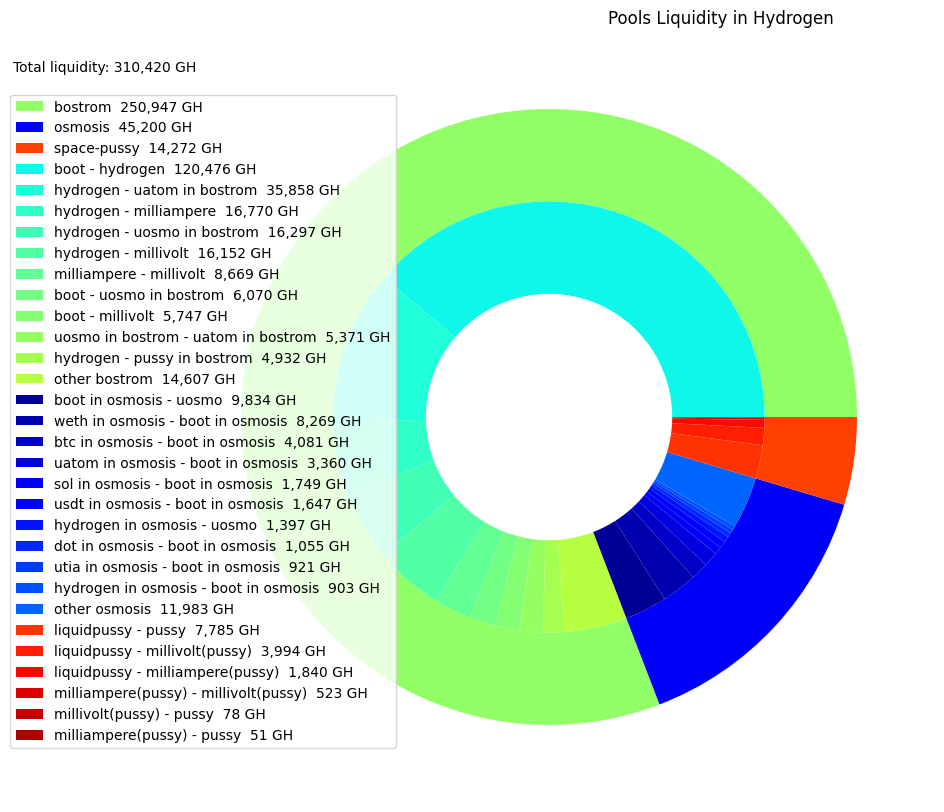

In [5]:
display(HTML(
    pools_df[['network', 'id', 'reserve_coin_denoms', 'liquidity, GH']]
    .sort_values(['network', 'liquidity, GH'], ascending=False)
    .to_html(index=False, notebook=True, show_dimensions=False, float_format='{0:7,.1f}'.format)
    .replace('text-align: left;', 'text-align: right')
    .replace('<tr>', '<tr align="right">')))

fig, ax = plt.subplots(figsize=(10, 10))
size = 0.3
cm = plt.get_cmap('jet', 20)
cm2 = plt.get_cmap('jet', 50)
cout = cm(np.array([10, 2, 16]))

outer = pools_df.groupby('network')['liquidity, GH'].sum().sort_index(
    axis=0, level=[0], ascending=[True], inplace=False)
inner = get_df_with_top_and_other(df=pools_df)

outer_labels = ['{0}  {1:>,.0f} GH'.format(i, j) for i, j in zip(outer.index, outer)]
inner_labels = ['{1}  {2:>,.0f} GH'.format(i[0], i[2], j) for i, j in zip(inner.index, inner)]
inner_cnt = inner.groupby('network').count().to_dict()
cin = cm2(np.array(
    list(range(18, 18 + inner_cnt['bostrom'])) +
    list(range(1, 1 + inner_cnt['osmosis'])) +
    list(range(42, 42 + inner_cnt['space-pussy']))))
ax.pie(outer.values.flatten(), radius=1,
       labeldistance=0.73,
       wedgeprops=dict(width=size), colors=cout)
ax.pie(inner.values.flatten(),
       radius=1 - size,
       wedgeprops=dict(width=size),
       labeldistance=0.5, colors=cin)

ax.text(-1.74, 1.12, f'Total liquidity: {round(sum(pools_df["liquidity, GH"])):>,} GH')
ax.set_title('Pools Liquidity in Hydrogen' + ' ' * 19, loc='right')

plt.legend(outer_labels + inner_labels, loc=(-0.2, 0.07))
handles, labels = ax.get_legend_handles_labels()
plt.show()

pools_df.to_csv('data/pools_liquidity.csv')

### Liquidity by Coins

Liquidity by Coins


coin,network,"liquidity, GH"
hydrogen,bostrom,106394.189181
boot,bostrom,71088.238633
uatom in bostrom,bostrom,22109.214361
boot in osmosis,osmosis,17577.398130
millivolt,bostrom,15283.705091
milliampere,bostrom,15002.193118
uosmo in bostrom,bostrom,14041.401548
liquidpussy,space-pussy,6809.642551
hydrogen in osmosis,osmosis,5840.921893
uosmo,osmosis,5615.839701


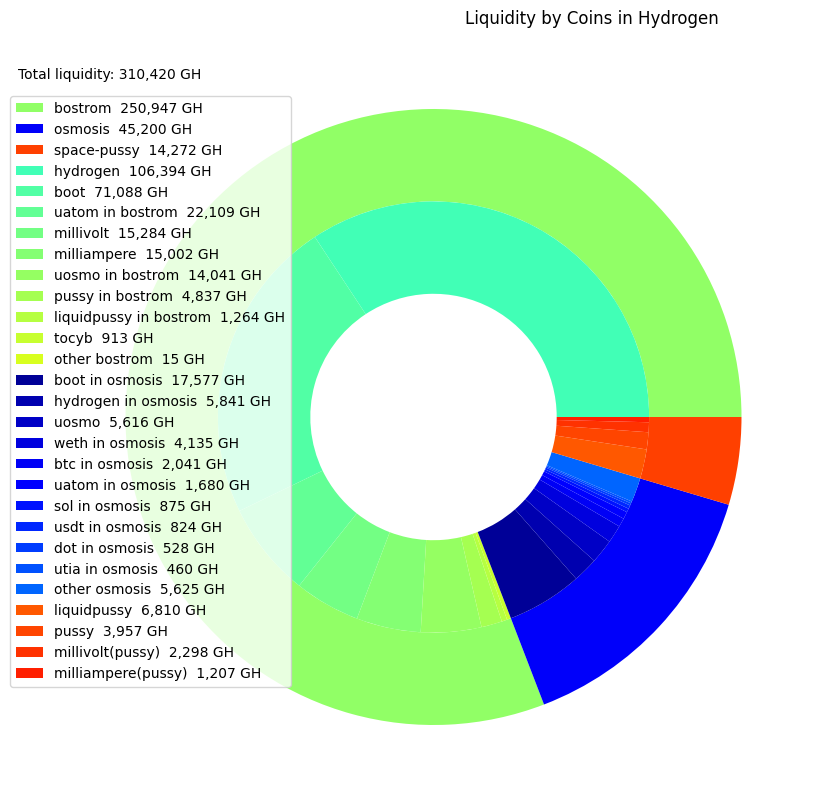

In [6]:
coin_list = set(chain(*pools_df.reserve_coin_denoms.to_list()))
coin_liquidity_data = []
coin_liquidity_df = pd.DataFrame(columns=['coin', 'network', 'liquidity, GH'])
for coin_denom in coin_list:
    pools_liquidity_agg_by_network_df = \
        pools_df[pools_df.reserve_coin_denoms.map(lambda x: coin_denom in x)].groupby('network')[
            'liquidity, GH'].sum() * 0.5
    for network, coin_liquidity in pools_liquidity_agg_by_network_df.items():
        coin_liquidity_data.append({
            'coin': coin_denom,
            'network': network,
            'liquidity, GH': coin_liquidity})
coin_liquidity_df = pd.DataFrame(coin_liquidity_data).sort_values('liquidity, GH', ascending=False).reset_index().drop(
    columns=['index'])

print('Liquidity by Coins')
display(HTML(
    coin_liquidity_df.to_html(
        index=False, notebook=True, show_dimensions=False)))

fig, ax = plt.subplots(figsize=(10, 10))
size = 0.3
cm = plt.get_cmap("jet", 20)
cm2 = plt.get_cmap("jet", 50)
cout = cm(np.array([10, 2, 16]))

outer = coin_liquidity_df.groupby('network')['liquidity, GH'].sum().sort_index(
    axis=0, level=[0], ascending=[True], inplace=False)
inner = get_df_with_top_and_other(df=coin_liquidity_df, col2_name='coin')

inner_labels = ['{1}  {2:>,.0f} GH'.format(i[0], i[2], j) for i, j in zip(inner.index, inner)]
outer_labels = ['{0}  {1:>,.0f} GH'.format(i, j) for i, j in zip(outer.index, outer)]
inner_cnt = inner.groupby('network').count().to_dict()
cin = cm2(np.array(
    list(range(21, 21 + inner_cnt['bostrom'])) +
    list(range(1, 1 + inner_cnt['osmosis'])) +
    list(range(40, 40 + inner_cnt['space-pussy']))))
ax.pie(outer.values.flatten(), radius=1,
       labeldistance=0.73,
       wedgeprops=dict(width=size), colors=cout)
ax.pie(inner.values.flatten(), radius=1 - size,
       wedgeprops=dict(width=size),
       labeldistance=0.5, colors=cin)

ax.text(-1.35, 1.1, f'Total liquidity: {round(sum(pools_df["liquidity, GH"])):>,} GH')
ax.set_title('Liquidity by Coins in Hydrogen                   ', loc='right')

plt.legend(outer_labels + inner_labels, loc=(-0.05, 0.15))
handles, labels = ax.get_legend_handles_labels()
plt.show()

# coin_liquidity_df.to_csv('data/coins_liquidity.csv')